# the goal is to create an adj matrix for the whole period between the top organization

In [8]:
import pandas as pd
import numpy as np
import glob
import json

# import data


In [9]:
df_email=pd.read_csv('top_organization_email.csv')


In [10]:
pd.set_option('display.max_columns', None)
df_email.head(4)

,filenm,From,Sent,To,CC,Bcc,Subject,Attachments,Importance,isThread,isAutoMessage,isDisplacement,hasAllCapLine,hasBadDate,Body,timestamp,date_sent,time_sent,cc,nb_words,nb_chars,body_len,body,mn_nb_words,std_nb_words,mn_nb_chars,std_nb_chars,email_count
0,07309_fn_34-3-ScottMaddox3_ln_27643.txt,info@flcities.com,"Thursday, June 6, 2013 10:20 AM",scott.maddox@talgov.com,invalid_nan,NaN,In Case You Missed It: State of the Cities Re...,NaN,NaN,False,False,True,False,False,"['Having trouble viewing this email?', 'Click ...",1.370510e+09,2013-06-06,09:20,INVALID_TYPE,539,6243,6781,Having trouble viewing this email? Click here ...,519.750000,352.354685,5903.214286,3860.043258,28
1,36410_fn_32-1-PaigeCS-1-2_ln_20727.txt,edward.kring@talgov.com,2/15/17 4:11 PM (GMT-05:00),mike.kissane@talgov.com;invalid,angela.baldwin@talgov.com,NaN,RE: Trolley test runs,NaN,NaN,False,False,False,False,False,['The consensus seems to be that we are hesita...,1.487175e+09,2017-02-15,16:07,Jay Rosser Jay.Johansen@talgov.com;Jay Harris...,78,396,473,The consensus seems to be that we are hesitant...,98.508197,210.751720,509.262295,993.019602,61
2,68317_fn_10-8-Cascade-2017_ln_116565.txt,ashley.edwards@talgov.com,"Wednesday, February 15, 2017 1:33 PM",ryan@edisontally.com,invalid_nan,NaN,Accepted: Updated Invitation: Summer Movie Ni...,NaN,NaN,False,True,True,False,False,"['2pm - 3pm (EST) (Ashley Edwards)', '21']",1.487166e+09,2017-02-15,13:33,INVALID_TYPE,7,29,35,2pm - 3pm (EST) (Ashley Edwards) 21,76.500000,58.669009,441.500000,360.704647,20
3,18389_fn_10-1-Cascade-2013_ln_9561.txt,roxanne.manning@talgov.com,"Friday, December 06, 2013 3:44 PM",rgrindler@101tally.com;charleshargraves;autumn...,markbeaudoin,NaN,RE: Meeting follow-up,NaN,NaN,False,False,False,False,False,"['Charles,', 'Agreed. As for the wooden covers...",1.386345e+09,2013-12-06,15:44,Mark Beaudoin,40,215,254,"Charles, Agreed. As for the wooden covers on t...",143.698113,324.517783,748.754717,1721.994259,53


In [11]:
with open('top_organization.json', 'r') as f:
    top_organization_dict = json.load(f)

# get the adj matrix

In [42]:
def nameToIndexDict(l_unique_names):
# create name to index dictionary and index to name dictionary for later use
# returns (name2id, id2name)
    name2id = {}
    for idx,name in enumerate(l_unique_names):    # unique_names
        name2id[name] = idx

    id2name = {}
    for idx, name in enumerate(l_unique_names):
        id2name[idx] = name

    return name2id, id2name

In [43]:
from_list = df_email['From'].values.tolist()
#for i in range(len(from_list)):
#    from_list[i] = eval(from_list[i])
#df_email['From'] = from_list

to_list = df_email['To'].values.tolist()
#for i in range(len(to_list)):
#    to_list[i] = eval(to_list[i])
#df_email['To'] = to_list

cc_list = df_email['CC'].values.tolist()

unique_people = set()
for i in range(len(from_list)):
    unique_people.add(from_list[i])

for i in range(len(cc_list)):
    for lst in cc_list[i].split(';'):
        unique_people.add(lst)

for i in range(len(to_list)):
    for lst in to_list[i].split(';'):
        unique_people.add(lst) 

unique_people = list(unique_people)
unique_people.sort()
name2id, id2name = nameToIndexDict(unique_people)










In [44]:
top_org_list = []
for v in top_organization_dict.values():
    top_org_list += v

nodes_to_add = list(top_organization_dict.keys()) 

top_org_idx_list = []
for i,people in enumerate(unique_people): #get the index in the unique people
    if people in top_org_list:
        top_org_idx_list.append(i)

  

In [45]:
num_people = len(unique_people)


In [46]:
num_people = len(unique_people)

idx_mapping = {}
top_org_idx_list_new = []
for person,idx_list in top_organization_dict.items():
    global_indices = []
    for idx in idx_list: #get the specific email in the email list of the dictionary's value.
        if idx not in unique_people:
            continue
        global_idx = unique_people.index(idx) #unique people is all the people involved in the top org email csv
        global_indices.append(global_idx)
        
    idx_mapping[person] = global_indices #domain and the related index in the unique people list.
    num_people +=1
    #cra_idx_list_new.append(num_people) 





In [47]:
idx_mapping['Florida State U'][1:5]

[1575, 373, 1893, 469]

In [48]:
col_names = []
for idx,name in enumerate(idx_mapping):    # unique_names
    #print(name, idx_mapping[name])
    col_names.append(name)
col_names

['101 Restaurant',
 'Ausley McMullen',
 'Blueprint Intergovernmental Agency',
 'Broward County',
 'Capital City Bank',
 'Capital Health Plan',
 'City of Tallahassee',
 'Florida A&M U',
 'Florida Department of Children and Family',
 'Florida Department of Health',
 'Florida Department of State',
 'Florida Department of Transportation',
 'Florida House of Representatives',
 'Florida League of Cities',
 'Florida State U',
 'Gadsden County',
 'Greater Tallahassee Chamber of Commerce',
 'HCA Healthcare',
 'Hancock Whitney Bank',
 'Hunter and Harp Wealth Management LLC',
 'NAI TALCOR',
 'Prime Meridian Bank',
 'Tallahassee Community College',
 'Tallahassee Democrat',
 'Tallahassee Memorial HealthCare',
 'The Edison Resteraunt',
 'The Zimmerman Agency',
 'U of Florida',
 'United Way of the Big Bend',
 'WCTV',
 'leon County',
 'leon County Schools']

In [49]:
for idx,name in enumerate(idx_mapping):
    print(idx, name)
    

0 101 Restaurant
1 Ausley McMullen
2 Blueprint Intergovernmental Agency
3 Broward County
4 Capital City Bank
5 Capital Health Plan
6 City of Tallahassee
7 Florida A&M U
8 Florida Department of Children and Family
9 Florida Department of Health
10 Florida Department of State
11 Florida Department of Transportation
12 Florida House of Representatives
13 Florida League of Cities
14 Florida State U
15 Gadsden County
16 Greater Tallahassee Chamber of Commerce
17 HCA Healthcare
18 Hancock Whitney Bank
19 Hunter and Harp Wealth Management LLC
20 NAI TALCOR
21 Prime Meridian Bank
22 Tallahassee Community College
23 Tallahassee Democrat
24 Tallahassee Memorial HealthCare
25 The Edison Resteraunt
26 The Zimmerman Agency
27 U of Florida
28 United Way of the Big Bend
29 WCTV
30 leon County
31 leon County Schools


In [20]:

### plot from to 

# build adj_mat
adj_mat_from_to = np.zeros((len(idx_mapping),len(idx_mapping)))

for i in range(len(from_list)):
    #s = name2id[from_list[i]] # id of the sender

    s_global_idx = unique_people.index(from_list[i]) # id of the sender

    # found index of this person in id_mapping 
    s_idx = -1
    for idx,name in enumerate(idx_mapping):    # unique_names
        #print(name, idx_mapping[name])
        if s_global_idx in idx_mapping[name]: # get index of the name in idx_mapping
            s_idx = idx
    if s_idx == -1:
          #print("Error: didn't find index for s_global_idx ",s_global_idx)
        continue

    rs = to_list[i].split(';')
    for j in range(len(rs)):
        if rs[j] != '':
            #r = name2id[rs[j]]  # id of the receiver
            r_global_idx = unique_people.index(rs[j])  # id of the receiver

            # found index of this person in id_mapping 
            r_idx = -1
            for idx,name in enumerate(idx_mapping):    # unique_names
                #print(name, idx_mapping[name])
                if r_global_idx in idx_mapping[name]: # get index of the name in idx_mapping
                    r_idx = idx
            if r_idx == -1:
                  #print("Error: didn't find index for r_global_idx ",r_global_idx)
                continue
            #print(s_idx,r_idx)
            adj_mat_from_to[s_idx,r_idx] += 1
#             adj_mat[s,r] += 1/num_TO_CC[i]

adj_mat_from_to_directed = np.copy(adj_mat_from_to)

#adj_mat_from_to_undirected = adj_mat_from_to + adj_mat_from_to.T #这个对角线数字会翻倍，需要修改。
#adj_mat_from_to_undirected = adj_mat_from_to + adj_mat_from_to.T 
adj_mat_from_to_undirected = adj_mat_from_to+adj_mat_from_to.T - np.diag(np.diag(adj_mat_from_to))


#adj_mat_from_to = np.triu(adj_mat_from_to, 1)
adj_mat_from_to_directed_pd = pd.DataFrame(data=adj_mat_from_to_directed, index=col_names, columns=col_names)
adj_mat_from_to_undirected_pd = pd.DataFrame(data=adj_mat_from_to_undirected, index=col_names, columns=col_names)

### plot from cc 

# build adj_mat
adj_mat_from_cc = np.zeros((len(idx_mapping),len(idx_mapping)))

for i in range(len(from_list)):
    #s = name2id[from_list[i]] # id of the sender

    s_global_idx = unique_people.index(from_list[i]) # id of the sender

    # found index of this person in id_mapping 
    s_idx = -1
    for idx,name in enumerate(idx_mapping):    # unique_names
        #print(name, idx_mapping[name])
        if s_global_idx in idx_mapping[name]: # get index of the name in idx_mapping
            s_idx = idx
    if s_idx == -1:
          #print("Error: didn't find index for s_global_idx ",s_global_idx)
        continue

    rs = cc_list[i].split(';')
    for j in range(len(rs)):
        if rs[j] != '' :
            #r = name2id[rs[j]]  # id of the receiver
            r_global_idx = unique_people.index(rs[j])  # id of the receiver

            # found index of this person in id_mapping 
            r_idx = -1
            for idx,name in enumerate(idx_mapping):    # unique_names
                #print(name, idx_mapping[name])
                if r_global_idx in idx_mapping[name]: # get index of the name in idx_mapping
                    r_idx = idx
            if r_idx == -1:
                  #print("Error: didn't find index for r_global_idx ",r_global_idx)
                continue
            #print(s_idx,r_idx)
            adj_mat_from_cc[s_idx,r_idx] += 1
#             adj_mat[s,r] += 1/num_TO_CC[i]

adj_mat_from_cc_directed = np.copy(adj_mat_from_cc)
#adj_mat_from_cc_undirected = adj_mat_from_cc + adj_mat_from_cc.T
#adj_mat_from_to = np.triu(adj_mat_from_to, 1)
adj_mat_from_cc_undirected = adj_mat_from_cc+adj_mat_from_cc.T - np.diag(np.diag(adj_mat_from_cc))

adj_mat_from_cc_directed_pd = pd.DataFrame(data=adj_mat_from_cc_directed, index=col_names, columns=col_names)
adj_mat_from_cc_undirected_pd = pd.DataFrame(data=adj_mat_from_cc_undirected, index=col_names, columns=col_names)


adj_mat_from_to_and_cc_directed = adj_mat_from_to_directed + adj_mat_from_cc_directed
adj_mat_from_to_and_cc_directed_pd = pd.DataFrame(data=adj_mat_from_to_and_cc_directed, index=col_names, columns=col_names)

adj_mat_from_to_and_cc_undirected = adj_mat_from_to_undirected + adj_mat_from_cc_undirected
adj_mat_from_to_and_cc_undirected_pd = pd.DataFrame(data=adj_mat_from_to_and_cc_undirected, index=col_names, columns=col_names)
    


In [46]:
#adj_mat_from_to_and_cc_directed_pd.to_csv('top org whole stage adj matrix.csv')

# based on adj matrix，draw email network figure

In [21]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import pandas as pd
from datetime import datetime

import copy
plt.rcParams["font.weight"] = "normal"


In [22]:
org_name=adj_mat_from_to_and_cc_directed_pd.columns.tolist()

In [23]:
org_gov=['Broward County','City of Tallahassee',
         'Florida Department of Children and Family',
 'Florida Department of Health',
 'Florida Department of State',
 'Florida Department of Transportation','Florida House of Representatives',
 'Florida League of Cities','Gadsden County','leon County']

In [24]:
org_non_gov=[]

for i in org_name:
    if i not in org_gov:
        org_non_gov.append(i)
    

In [25]:
org_non_gov

['101 Restaurant',
 'Ausley McMullen',
 'Blueprint Intergovernmental Agency',
 'Capital City Bank',
 'Capital Health Plan',
 'Florida A&M U',
 'Florida State U',
 'Greater Tallahassee Chamber of Commerce',
 'HCA Healthcare',
 'Hancock Whitney Bank',
 'Hunter and Harp Wealth Management LLC',
 'NAI TALCOR',
 'Prime Meridian Bank',
 'Tallahassee Community College',
 'Tallahassee Democrat',
 'Tallahassee Memorial HealthCare',
 'The Edison Resteraunt',
 'The Zimmerman Agency',
 'U of Florida',
 'United Way of the Big Bend',
 'WCTV',
 'leon County Schools']

In [26]:
school=['leon County Schools','U of Florida','Tallahassee Community College','Florida A&M U',
 'Florida State U']

In [27]:
non_school_non_gov=[]
for i in org_non_gov:
    if i not in school:
        non_school_non_gov.append(i)


In [29]:
nodes_names = list(adj_mat_from_to_and_cc_directed_pd.columns)

directed_adj_np=adj_mat_from_to_and_cc_directed_pd.iloc[:,:].to_numpy().astype('float')
directed_adj_np

array([[ 62.,   0.,   5., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  7.,   0.,  17., ...,   0.,  28.,   0.],
       ...,
       [  0.,   0.,   0., ...,   0.,   6.,   0.],
       [  0.,   0.,   0., ...,   1.,  21.,   2.],
       [  0.,   0.,   0., ...,   0.,  68., 107.]])

In [30]:
def plot_network_directed(adj_mat,nodes_names, pic_name = 'test', savefig=False):
    #fig = plt.figure(figsize=(12,12))
    #fig.suptitle(pic_name,fontsize = 24, y=1.04)

    #group1 = ['bill_proctor','curtis_richardson']
    
    if adj_mat[adj_mat !=0].mean() >25 : # in case number is too high, make points smaller
        adj_mat = adj_mat / 10
        
    #if adj_mat[adj_mat !=0].mean() < 3 and adj_mat[adj_mat !=0].mean() >=1.8 : # in case number is too low, make points larger
     #   adj_mat = adj_mat * 2
    
    
    group1= school
    group1_list=[]
    for i,people in enumerate(nodes_names):
        if people in group1:
            group1_list.append(i)
    group1_list

    group2 = org_gov
    group2_list=[]
    for i,people in enumerate(nodes_names):
        if people in group2:
            group2_list.append(i)
    group2_list

    group3 = non_school_non_gov
    group3_list=[]
    for i,people in enumerate(nodes_names):
        if people in group3:
            group3_list.append(i)
    group3_list

    name2id = {}
    id2name = {}
    for i in range(len(nodes_names)):
        name2id[nodes_names[i]] = i
        id2name[i] = nodes_names[i]


    # new
    fig = plt.figure(figsize=(20,14))
    #fig.suptitle(pic_name,fontsize = 24, y=1.04)
    #fig.text(.5, 1.005, 'edge thickness: #emails weighted by #receivers, then normalized $\in$(0,1)\n node size: #emails related', fontsize = 20, ha='center')

    G = nx.DiGraph(directed=True) #change to directed network
    G.add_nodes_from(nodes_names)
    #prepare for plot
    networks = [1,2,3]

    networks_list = []
    for i in range(len(nodes_names)):
        if i in group1_list:
            networks_list.append(1)
        elif i in group2_list:
            networks_list.append(2) 
        else:
            networks_list.append(3)
    # map color
    node_network_map = dict(zip(nodes_names, networks_list))
    colors = ['red','orange' , 'green']
    color_map = dict(zip(networks, colors))

    print("nodes_names: ",len(nodes_names))
    print("adj_mat: ",adj_mat.shape)
    for row, row_val in enumerate(nodes_names):
        for col, col_val in enumerate(nodes_names):
            #if col < row and adj_mat[row, col] != 0.0:
            if adj_mat[row, col] != 0.0 and col != row:
                G.add_edge(row_val, col_val)

    nodes_by_color = {val: [node for node in G if color_map[node_network_map[node]] == val]
                      for val in colors}

    
    pos = nx.circular_layout(G)
    #pos = nx.spring_layout(G)

    radii = [3,6,10]  # for concentric circles

    for ea in pos.keys():
        new_r = 1
        if ea in nodes_by_color['red']:
            new_r = radii[0]
        elif ea in nodes_by_color['orange']:
            new_r = radii[1]
        elif ea in nodes_by_color['green']:
            new_r = radii[2]
        else:
            pass
        pos[ea] *= new_r   # reposition nodes as concentric circles
    #scale edge width
    edge_width = []
    edges_list = G.edges()
    for s,t in edges_list:
        edge_width.append(adj_mat[name2id[s],name2id[t]])
    edge_width = np.array(edge_width)
    edge_width = edge_width*0.3
#scale node size
    node_size = adj_mat.sum(axis=0)+1
    node_size = 10*node_size
    labeling_idx = node_size.argsort()[::-1]
    labels = {}
    for i in labeling_idx:
        node = id2name[i]
        tmp = node#john_mark
        labels[node] = tmp

    node_sizes = {}
    node_sizes['red'] = node_size[group1_list]
    node_sizes['orange'] = node_size[group2_list]
    node_sizes['green'] = node_size[group3_list]
    #node_sizes['green'] = node_size[[item for item in np.arange(len(nodes_names)) if item not in (group1_list+group2_list)]]

    legend_labels = {'red': 'School','orange': 'Government Agency','green': 'Non-government Agency' }
    pos_new = copy.deepcopy(pos)
    for k, v in pos.items():
        print("k: ", k, " v: ",v)
        if k == 'City of Tallahassee':
            pos_new[k][0] = pos_new[k][0] 
            pos_new[k][1] = pos_new[k][1]-10
        elif k == 'Florida Department of Children and Family':
            pos_new[k][0] = pos_new[k][0] 
            pos_new[k][1] = pos_new[k][1]-13
        elif k == 'Florida Department of State':
            pos_new[k][0] = pos_new[k][0]+8
            pos_new[k][1] = pos_new[k][1]
        elif k == 'Tallahassee Memorial HealthCare':
            pos_new[k][0] = pos_new[k][0]+8
            pos_new[k][1] = pos_new[k][1]
        elif k == 'Greater Tallahassee Chamber of Commerce':
            pos_new[k][0] = pos_new[k][0]+1.3
            pos_new[k][1] = pos_new[k][1]
            
            
            
            
            
    for color, node_names in nodes_by_color.items():
        local_node_size = node_sizes[color]
        nx.draw_networkx_nodes(G, pos=pos_new, node_size=local_node_size, edgecolors='darkblue', nodelist=node_names, node_color=color, label=legend_labels[color])

        
    
#       if k == 'curtisrichardson':
#         pos_new[k][0] = pos_new[k][0] 
#         pos_new[k][1] = pos_new[k][1]
        
        
   
    nx.draw_networkx_edges(G, pos=pos_new, width=edge_width, edge_color = 'black')

    print("pos: ", len(pos), ' labels: ', len(labels))

   #pos_new = copy.deepcopy(pos)
    

#       if k=='billproctor':
#         pos_new[k][0] = pos_new[k][0] + 1.4



    nx.draw_networkx_labels(G, pos=pos_new, labels=labels, font_size=16, font_color='black')
    
    plt.legend(fontsize = 24, loc=0)
    plt.axis('off')

    #plt.subplots_adjust(left=0.4, bottom=0.1, right=0.9, top=0.2)
    #plt.subplots_adjust(left=0, bottom=0, right=1, top=4, wspace=0, hspace=0)
    plt.title(pic_name,fontsize = 24, fontweight='bold')

    plt.tight_layout()
    if savefig == True:
        savefig_out = pic_name.replace(' ','_')
        plt.savefig(savefig_out+'.png')
    plt.show()

nodes_names:  32
adj_mat:  (32, 32)
k:  101 Restaurant  v:  [ 1.00000000e+01 -4.25295747e-08]
k:  Ausley McMullen  v:  [9.80785251 1.95090316]
k:  Blueprint Intergovernmental Agency  v:  [9.23879505 3.82683446]
k:  Broward County  v:  [4.98881759 3.33342139]
k:  Capital City Bank  v:  [7.07106774 7.07106754]
k:  Capital Health Plan  v:  [5.55570252 8.31469578]
k:  City of Tallahassee  v:  [2.29610079 5.54327691]
k:  Florida A&M U  v:  [0.5852711  2.94235569]
k:  Florida Department of Children and Family  v:  [-1.66901390e-07  5.99999988e+00]
k:  Florida Department of Health  v:  [-1.17054183  5.88471138]
k:  Florida Department of State  v:  [-2.29610025  5.54327727]
k:  Florida Department of Transportation  v:  [-3.33342096  4.98881783]
k:  Florida House of Representatives  v:  [-4.24264045  4.24264052]
k:  Florida League of Cities  v:  [-4.98881776  3.33342103]
k:  Florida State U  v:  [-2.77163842  1.14805043]
k:  Gadsden County  v:  [-5.88471167  1.17054181]
k:  Greater Tallahassee 

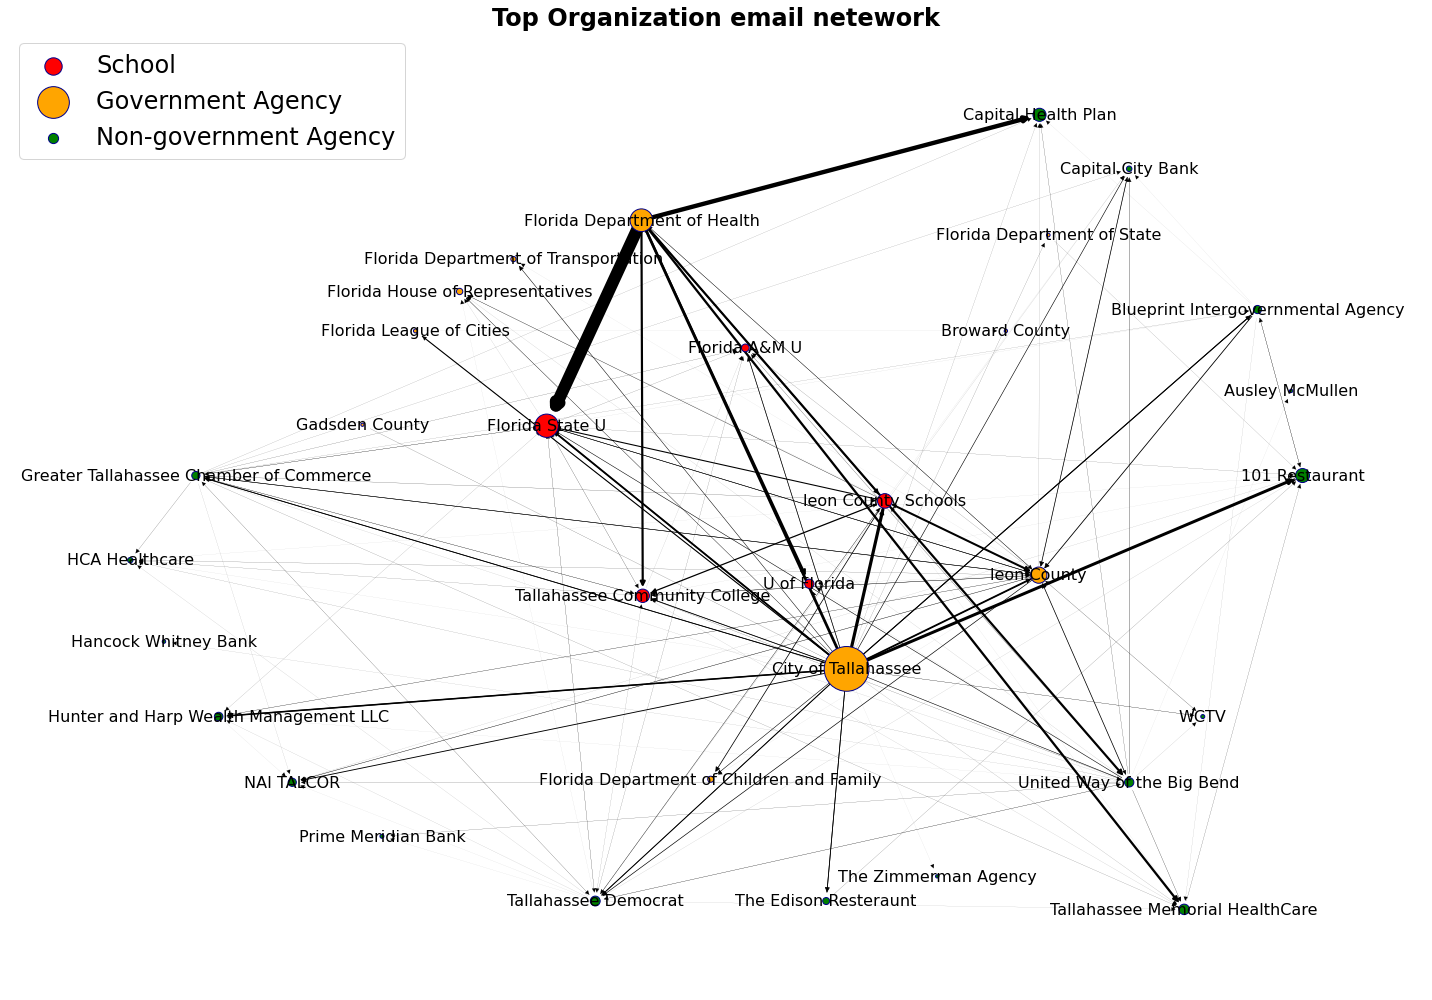

In [31]:
whole_stage=plot_network_directed(directed_adj_np,nodes_names, pic_name = 'Top Organization email netework', savefig=False)




#  calculate centrality by month

 betweenness and closeness centrality, the weight is the inverse of email number

In [32]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
from numpy import inf
import csv
from numpy import genfromtxt
import glob

## get email by month

In [39]:
# groupby your key and freq
data_new = df_email.copy() 
data_new['date_sent']=pd.to_datetime(data_new.date_sent)           
data_new = data_new.sort_values(by = ['date_sent']) 

g = data_new.groupby(pd.Grouper(key='date_sent', freq='M'))
# groups to a list of dataframes with list comprehension

dfs = [group for _,group in g]
for i in range(len(dfs)):
    if len(dfs[i])!=0:
        name=str(dfs[i]['date_sent'].tolist()[0])[0:7] #get the first seven character,that is year_month #??名字怎么改？
        #dfs[i].to_csv(str(i)+'_'+name+'.csv',index=0)
  



## calculate adj matrix by month

In [41]:
def nameToIndexDict(l_unique_names):
# create name to index dictionary and index to name dictionary for later use
# returns (name2id, id2name)
    name2id = {}
    for idx,name in enumerate(l_unique_names):    # unique_names
        name2id[name] = idx

    id2name = {}
    for idx, name in enumerate(l_unique_names):
        id2name[idx] = name

    return name2id, id2name

In [ ]:
#define a function to transform email into adj matrix

def process_data_both_new(infile):
    df_email = pd.read_csv(infile,index_col = 0)
    from_list = df_email['From'].values.tolist()
    #for i in range(len(from_list)):
    #    from_list[i] = eval(from_list[i])
    #df_email['From'] = from_list

    to_list = df_email['To'].values.tolist()
    #for i in range(len(to_list)):
    #    to_list[i] = eval(to_list[i])
    #df_email['To'] = to_list

    cc_list = df_email['CC'].values.tolist()

    unique_people = set()
    for i in range(len(from_list)):
        unique_people.add(from_list[i])

    for i in range(len(cc_list)):
        for lst in cc_list[i].split(';'):
            unique_people.add(lst)

    for i in range(len(to_list)):
        for lst in to_list[i].split(';'):
            unique_people.add(lst) 

    unique_people = list(unique_people)
    unique_people.sort()
    name2id, id2name = nameToIndexDict(unique_people)





## calculate centrality

In [4]:

adj_folder=r'/Users/yoga/Documents/Projects/4 合作项目 腐败 economic corruption/63_top organization network and centrality 20220617/top_org_adj_matrix by month'
all_files = glob.glob(adj_folder + "/*.csv")
outdir='/Users/yoga/Documents/Projects/4 合作项目 腐败 economic corruption/63_top organization network and centrality 20220617/centrality_weighted'



这些都是老的代码，作为参考！


下面需要实现把email 变成 adj matrix 的批量处理
批量处理成功，但是命名方式不对
怎么改？
ok about name

下面要实现的就是批量读取adj matrix csv 然后批量调用函数,批量计算出centrality.

In [71]:
import pandas as pd
import glob
from numpy import genfromtxt

path = r'/Users/yoga/Documents/Projects/4 合作项目 腐败 economic corruption/82 replicate the figure in the paper 2020423/93 adj matrix related to the file 94 the split email by month ' # use your path
adj_all = glob.glob(path + "/*.csv")



for filename in adj_all:
    df = pd.read_csv(filename, index_col=None)
    

下面要做的是把计算中心度的过程合成一个function,然后直接调用

In [72]:
def centrality_calculation(file):
    file.columns.to_list()
    #read network
    file_net=genfromtxt(file,delimiter=',')
    #get matrix
    adj_file_net=file_net[1:,1:]
    #get networks
    networks = nx.from_numpy_matrix(adj_file_net)
    #get degree centrality
   # net_dc=degree_centrality(networks)
    net_bc=nx.betweenness_centrality((networks))
  #  return net_dc, net_bc
    return net_bc
    
    
    

In [74]:
#test=pd.read_csv('/Users/yoga/Documents/Projects/4 合作项目 腐败 economic corruption/82 replicate the figure in the paper 2020423/93 adj matrix related to the file 94 the split email by month/all0.csv')

In [75]:
import os

In [76]:
### calculate centrality

import pandas as pd
import glob
import os

path = r'/Users/yoga/Documents/Projects/4 合作项目 腐败 economic corruption/82 replicate the figure in the paper 2020423/94 split file 95 i.e. email by month ' # use your path
all_files = glob.glob(path + "/*.csv")
ind=0

for file in all_files:
    to,cc,adj_mat_all=process_data(file)
    tmp = file.split('/')
    filename = tmp[-1].replace('.csv','')
    #adj_mat_all.to_csv(str(ind)+'-all-'+filename+'.csv')
    ind=ind+1


In [77]:
adj_folder = r'/Users/yoga/Documents/Projects/4 合作项目 腐败 economic corruption/82 replicate the figure in the paper 2020423/93 adj matrix related to the file 94 the split email by month'

In [78]:
test_file = adj_folder + '/0-all-2015_01.csv'

In [79]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd



In [80]:

#data=pd.read_csv(test_file,index_col=0)
#name=data.columns.to_list()
#data

In [81]:
all_files = glob.glob(adj_folder + "/*.csv")
outdir = '/Users/yoga/Documents/Projects/4 合作项目 腐败 economic corruption/82 replicate the figure in the paper 2020423/92 calculate the centrality by month'

try:
    os.makedirs(outdir)
except FileExistsError:
    # directory already exists
    pass

ind=0

whole_network_mean_csv = pd.DataFrame(columns = ['time','degree_centrality','betweenness_centrality',
                                      'closeness_centrality','clustering coefficient',
                                     'density','average_clustering for network'])

whole_network_std_csv = pd.DataFrame(columns = ['time','degree_centrality','betweenness_centrality',
                                      'closeness_centrality','clustering coefficient',
                                     'density','average_clustering for network'])

for file in all_files:
    tmp = file.split('/')
    filename = tmp[-1].replace('.csv','')
    ind=ind+1

    data=pd.read_csv(file,index_col=0)
    name=data.columns.to_list()
    adj_s1 = data.to_numpy()
    #s1=genfromtxt(test_file,delimiter=',')
    #get matrix
    #adj_s1 = s1[1:,1:]
    #get networks
    gs1 = nx.from_numpy_matrix(adj_s1)
    gs1_dc = nx.degree_centrality(gs1)
    gs1_bc=nx.betweenness_centrality((gs1))
    gs1_cc=nx.closeness_centrality((gs1))
    gs1_den=nx.density(gs1)
    #calculate the clustering coefficient for the nodes
    gs1_cl=nx.clustering(gs1)
    gs1_acl=nx.average_clustering(gs1)
    import pandas as pd 
    gs1_csv = pd.DataFrame(columns = ['Name','degree_centrality','betweenness_centrality',
                                      'closeness_centrality','clustering coefficient',
                                     'density','average_clustering for network'])

    for i in range(len(name)):
        name_va=name[i]
        gs1_dc_va=gs1_dc[i]
        gs1_bc_va=gs1_bc[i]
        gs1_cc_va=gs1_cc[i]
        gs1_cl_va=gs1_cl[i]
        gs1_acl_va=gs1_acl
        gs1_den_va=gs1_den

        gs1_csv=gs1_csv.append({'Name':name_va,'degree_centrality': gs1_dc_va,'betweenness_centrality':gs1_bc_va,
                      'closeness_centrality':gs1_cc_va,'clustering coefficient':gs1_cl_va, 'density':gs1_den_va,
                      'average_clustering for network':gs1_acl_va },ignore_index=True)


    # add mean 
    #print(gs1_csv)
    
    name_va='Whole_network_mean'
    gs1_dc_va=gs1_csv.iloc[:,1].mean()
    gs1_bc_va=gs1_csv.iloc[:,2].mean()
    gs1_cc_va=gs1_csv.iloc[:,3].mean()
    gs1_cl_va=gs1_csv.iloc[:,4].mean()
    gs1_acl_va=gs1_csv.iloc[:,5].mean()
    gs1_den_va=gs1_csv.iloc[:,6].mean()
    gs1_csv=gs1_csv.append({'Name':name_va,'degree_centrality': gs1_dc_va,'betweenness_centrality':gs1_bc_va,
                      'closeness_centrality':gs1_cc_va,'clustering coefficient':gs1_cl_va, 'density':gs1_den_va,
                      'average_clustering for network':gs1_acl_va },ignore_index=True)
    
    time=filename.split('-')[-1]
    whole_network_mean_csv=whole_network_mean_csv.append({'time':time,'degree_centrality': gs1_dc_va,'betweenness_centrality':gs1_bc_va,
                      'closeness_centrality':gs1_cc_va,'clustering coefficient':gs1_cl_va, 'density':gs1_den_va,
                      'average_clustering for network':gs1_acl_va },ignore_index=True)

    # add std 
    #print(gs1_csv)
    
    name_va='Whole_network_std'
    gs1_dc_va=gs1_csv.iloc[:,1].std()
    gs1_bc_va=gs1_csv.iloc[:,2].std()
    gs1_cc_va=gs1_csv.iloc[:,3].std()
    gs1_cl_va=gs1_csv.iloc[:,4].std()
    gs1_acl_va=gs1_csv.iloc[:,5].std()
    gs1_den_va=gs1_csv.iloc[:,6].std()
    gs1_csv=gs1_csv.append({'Name':name_va,'degree_centrality': gs1_dc_va,'betweenness_centrality':gs1_bc_va,
                      'closeness_centrality':gs1_cc_va,'clustering coefficient':gs1_cl_va, 'density':gs1_den_va,
                      'average_clustering for network':gs1_acl_va },ignore_index=True)
    
    time=filename.split('-')[-1]
    whole_network_std_csv=whole_network_std_csv.append({'time':time,'degree_centrality': gs1_dc_va,'betweenness_centrality':gs1_bc_va,
                      'closeness_centrality':gs1_cc_va,'clustering coefficient':gs1_cl_va, 'density':gs1_den_va,
                      'average_clustering for network':gs1_acl_va },ignore_index=True)

    #gs1_csv.to_csv(outdir+'/'+filename+'_centrality.csv',index=False)
    
    
    

In [82]:
gs1_csv.iloc[:,1].std()

0.03507964110937505

In [83]:
#whole_network_mean_csv = whole_network_mean_csv.sort_values(by=['time'], ascending=True)
#whole_network_mean_csv = whole_network_mean_csv.reset_index(drop=True)
#whole_network_mean_csv.to_csv(outdir+'/whole_network_centrality_mean.csv',index=False)
#whole_network_mean_csv

In [139]:
#whole_network_std_csv = whole_network_std_csv.sort_values(by=['time'], ascending=True)
whole_network_std_csv = whole_network_std_csv.reset_index(drop=True)
#whole_network_std_csv.to_csv(outdir+'/whole_network_centrality_std.csv',index=False)
whole_network_std_csv

,time,degree_centrality,betweenness_centrality,closeness_centrality,clustering coefficient,density,average_clustering for network
0,2012_05,0.024281,0.000000,0.024281,0.000000,0.002381,0.002381
1,2012_06,0.062814,0.000000,0.024281,0.000000,0.007143,0.007143
2,2012_07,0.085978,0.002741,0.045564,0.000000,0.009524,0.009524
3,2012_11,0.076783,0.002741,0.047354,0.000000,0.011905,0.011905
4,2012_12,0.142061,0.069815,0.180219,0.360531,0.021825,0.021825
5,2013_01,0.158221,0.036758,0.160184,0.363291,0.028651,0.028651
6,2013_02,0.035635,0.000000,0.000000,0.000000,0.002381,0.002381
7,2013_03,0.136692,0.024670,0.119683,0.338231,0.015952,0.015952
8,2013_04,0.169031,0.033056,0.168112,0.404139,0.039841,0.039841
9,2013_05,0.220080,0.129108,0.182219,0.231142,0.014550,0.014550


In [57]:
#add density picture
whole_network_mean_csv=pd.read_csv('/Users/yoga/Documents/Projects/4 合作项目 腐败 economic corruption/82 replicate the figure in the paper 2020423/network_mean_full_time.csv')
whole_network_mean_csv.head(5)
whole_network_std_csv=pd.read_csv('/Users/yoga/Documents/Projects/4 合作项目 腐败 economic corruption/82 replicate the figure in the paper 2020423/network_std_full_time.csv')



In [60]:
bin_labels = {}
mean_bin_data = {}
std_bin_data = {}
column = ['Density']
for indx in whole_network_mean_csv.index:
    bin_labels[indx] = whole_network_mean_csv['Time'][indx]
    bin_labels[indx] = whole_network_std_csv['Time'][indx]
    mean_bin_data[indx] = whole_network_mean_csv[column][indx]
    std_bin_data[indx] = whole_network_std_csv[column][indx]

myDict = {'Bin': bin_labels, 'Avg.' : mean_bin_data}  
myDF = pd.DataFrame(myDict)

outdir = r'/Users/yoga/Documents/Projects/4 合作项目 腐败 economic corruption/82 replicate the figure in the paper 2020423/91 figure of centrality'
plot_figure(myDF,column,outdir+'/'+column+'.png')

KeyError: 0

In [61]:
bin_labels = {}
mean_bin_data = {}
std_bin_data = {}
column = 'degree_centrality'
for indx in whole_network_std_csv.index:
    bin_labels[indx] = whole_network_mean_csv['time'][indx]
    bin_labels[indx] = whole_network_std_csv['time'][indx]
    mean_bin_data[indx] = whole_network_mean_csv[column][indx]
    std_bin_data[indx] = whole_network_std_csv[column][indx]

myDict = {'Bin': bin_labels, 'Avg.' : mean_bin_data, 'Std. deviation': std_bin_data}  
myDF = pd.DataFrame(myDict)

outdir = r'/Users/yoga/Documents/Projects/4 合作项目 腐败 economic corruption/82 replicate the figure in the paper 2020423/91 figure of centrality'
plot_figure(myDF,column,outdir+'/'+column+'.png')

KeyError: 'time'

In [16]:
whole_network_std_csv.columns

Index(['Time', 'Degree Centrality', 'Betweenness Centrality',
       'Closeness Centrality', 'Edge Size', 'Node Size', 'Density',
       'Clustering Coefficient', 'Average Clustering'],
      dtype='object')

In [2]:
whole_network_std_csv=pd.read_csv('/Users/yoga/Documents/Projects/4 合作项目 腐败 economic corruption/82 replicate the figure in the paper 2020423/network_std_full_time.csv')
whole_network_mean_csv=pd.read_csv('/Users/yoga/Documents/Projects/4 合作项目 腐败 economic corruption/82 replicate the figure in the paper 2020423/network_mean_full_time.csv')

In [4]:
whole_network_std_csv.head(5)

,Time,Degree Centrality,Betweenness Centrality,Closeness Centrality,Edge Size,Node Size,Density,Clustering Coefficient,Average Clustering
0,2012_05,0.024281,0.000000,0.024281,0.0,0.0,3.469447e-18,0.0,0.0
1,2012_06,0.062814,0.000000,0.024281,0.0,0.0,6.938894e-18,0.0,0.0
2,2012_07,0.085978,0.002741,0.045564,0.0,0.0,1.387779e-17,0.0,0.0
3,2012_08,0.000000,0.000000,0.000000,0.0,0.0,0.000000e+00,0.0,0.0
4,2012_09,0.000000,0.000000,0.000000,0.0,0.0,0.000000e+00,0.0,0.0


In [5]:
whole_network_mean_csv.head(5)

,Time,Degree Centrality,Betweenness Centrality,Closeness Centrality,Edge Size,Node Size,Density,Clustering Coefficient,Average Clustering
0,2012_05,0.009524,0.000000,0.009524,1.0,2,0.009524,0.0,0.0
1,2012_06,0.028571,0.000000,0.009524,3.0,3,0.028571,0.0,0.0
2,2012_07,0.038095,0.000733,0.022222,4.0,3,0.038095,0.0,0.0
3,2012_08,0.000000,0.000000,0.000000,0.0,0,0.000000,0.0,0.0
4,2012_09,0.000000,0.000000,0.000000,0.0,0,0.000000,0.0,0.0


In [52]:
whole_network_std_csv.head(5)

,Time,Degree Centrality,Betweenness Centrality,Closeness Centrality,Edge Size,Node Size,Density,Clustering Coefficient,Average Clustering
0,2012_05,0.024281,0.000000,0.024281,0.0,0.0,3.469447e-18,0.0,0.0
1,2012_06,0.062814,0.000000,0.024281,0.0,0.0,6.938894e-18,0.0,0.0
2,2012_07,0.085978,0.002741,0.045564,0.0,0.0,1.387779e-17,0.0,0.0
3,2012_08,0.000000,0.000000,0.000000,0.0,0.0,0.000000e+00,0.0,0.0
4,2012_09,0.000000,0.000000,0.000000,0.0,0.0,0.000000e+00,0.0,0.0


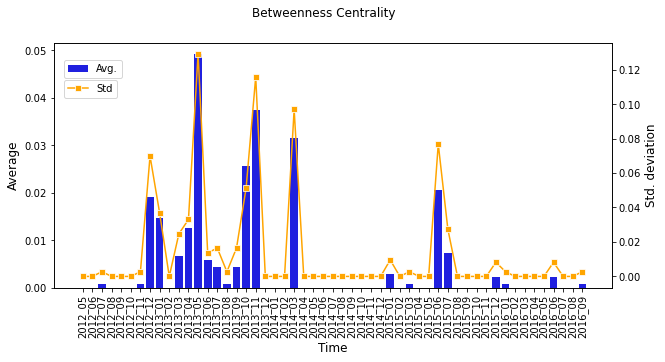

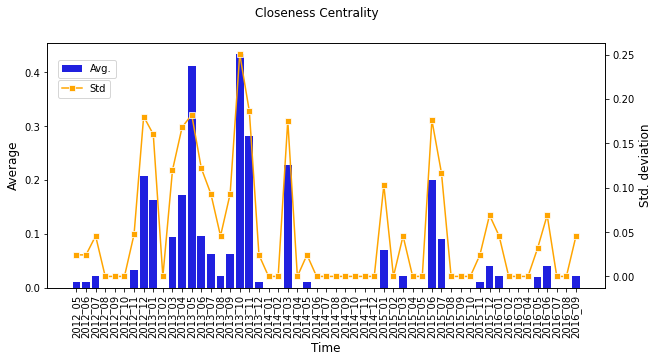

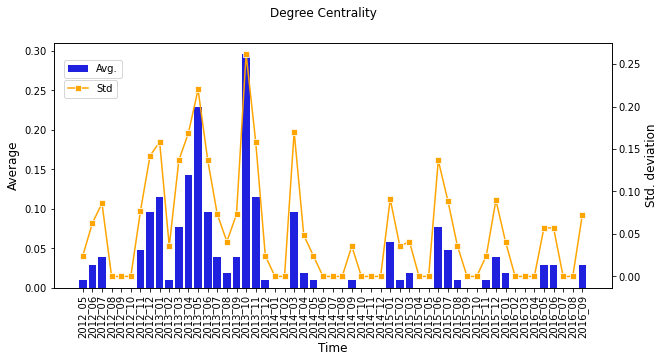

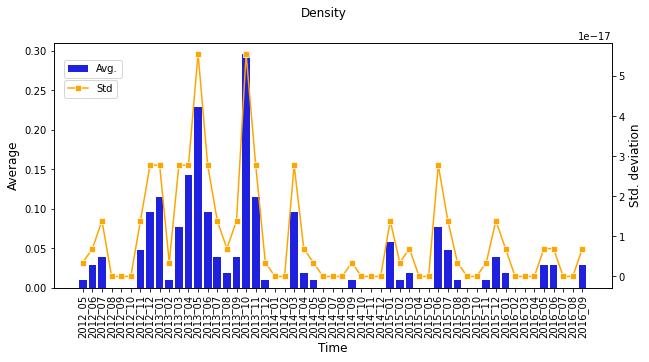

In [8]:
bin_labels = {}
mean_bin_data = {}
std_bin_data = {}
column = ['Betweenness Centrality','Closeness Centrality','Degree Centrality','Density']
for i in column:
    for indx in whole_network_std_csv.index:
        bin_labels[indx] = whole_network_mean_csv['Time'][indx]
        bin_labels[indx] = whole_network_std_csv['Time'][indx]
        mean_bin_data[indx] = whole_network_mean_csv[i][indx]
        std_bin_data[indx] = whole_network_std_csv[i][indx]

    myDict = {'Bin': bin_labels, 'Avg.' : mean_bin_data, 'Std. deviation': std_bin_data}  
    myDF = pd.DataFrame(myDict)

    outdir = r'/Users/yoga/Documents/Projects/4 合作项目 腐败 economic corruption/82 replicate the figure in the paper 2020423/89 yoga try pic'
    ad_plot_figure(myDF,i,outdir+'/'+i+'.png')

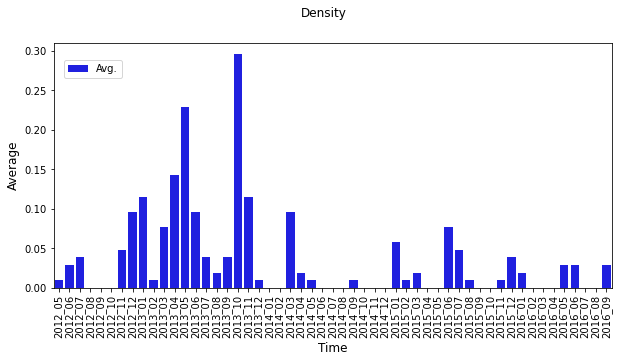

In [4]:
bin_labels = {}
mean_bin_data = {}
std_bin_data = {}
column = ['Density']
for i in column:
    for indx in whole_network_std_csv.index:
        bin_labels[indx] = whole_network_mean_csv['Time'][indx]
        bin_labels[indx] = whole_network_std_csv['Time'][indx]
        mean_bin_data[indx] = whole_network_mean_csv[i][indx]
        std_bin_data[indx] = whole_network_std_csv[i][indx]

    myDict = {'Bin': bin_labels, 'Avg.' : mean_bin_data, 'Std. deviation': std_bin_data}  
    myDF = pd.DataFrame(myDict)

    outdir = r'/Users/yoga/Documents/Projects/4 合作项目 腐败 economic corruption/82 replicate the figure in the paper 2020423/89 yoga try pic'
    ad_plot_figure2(myDF,i,outdir+'/'+i+'_2.png')

这里要尝试批量画图？？

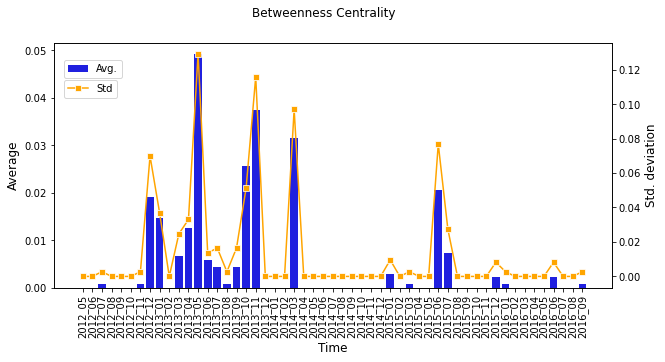

In [31]:
bin_labels = {}
mean_bin_data = {}
std_bin_data = {}
column = 'Betweenness Centrality'
for indx in whole_network_std_csv.index:
    bin_labels[indx] = whole_network_mean_csv['Time'][indx]
    bin_labels[indx] = whole_network_std_csv['Time'][indx]
    mean_bin_data[indx] = whole_network_mean_csv[column][indx]
    std_bin_data[indx] = whole_network_std_csv[column][indx]

myDict = {'Bin': bin_labels, 'Avg.' : mean_bin_data, 'Std. deviation': std_bin_data}  
myDF = pd.DataFrame(myDict)

outdir = r'/Users/yoga/Documents/Projects/4 合作项目 腐败 economic corruption/82 replicate the figure in the paper 2020423/89 yoga try pic'
ad_plot_figure(myDF,column,outdir+'/'+column+'.png')



下面自己修改

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def plot_figure(myDF,title,outputfile):
    fig=plt.figure(figsize=(10,5))
    fig.autofmt_xdate(rotation=45)
    ax1 = fig.add_subplot(111)
    ax2 = ax1.twinx()
    sns.barplot(x='Bin',y='Avg.',data=myDF,color='blue',ax=ax1)

    # only change this line
    sns.lineplot(x=myDF.index, y='Std. deviation',data=myDF,marker='s',color='orange',ax=ax2)

    #plt.xticks(myDF.index, myDF.Bin, rotation=60)
    plt.setp(ax1.get_xticklabels(), rotation=90)

    fig.suptitle(title, fontsize=12)
    ax1.set_xlabel('Time', fontsize=12)
    ax1.set_ylabel('Average', fontsize=12)
    ax2.set_ylabel('Std. deviation', fontsize=12)
    

    # setting label sizes after creation
    ax.xaxis.label.set_size(20)
    
    plt.savefig(outputfile, bbox_inches='tight', dpi=600)

    #plt.show()

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def ad_plot_figure(myDF,title,outputfile):
    fig=plt.figure(figsize=(10,5))
    fig.autofmt_xdate(rotation=45)
    ax1 = fig.add_subplot(111)
    ax2 = ax1.twinx()
    sns.barplot(x='Bin',y='Avg.',data=myDF,color='blue',ax=ax1,label='Avg.')

    # only change this line
    sns.lineplot(x=myDF.index, y='Std. deviation',data=myDF,marker='s',color='orange',ax=ax2,label='Std')

    #plt.xticks(myDF.index, myDF.Bin, rotation=60)
    plt.setp(ax1.get_xticklabels(), rotation=90)

    fig.suptitle(title, fontsize=12)
    ax1.set_xlabel('Time', fontsize=12)
    ax1.set_ylabel('Average', fontsize=12)
    ax2.set_ylabel('Std. deviation', fontsize=12)
    ax1.legend(loc="upper left",bbox_to_anchor=(0.01,0.95))
    ax2.legend(loc="upper left",bbox_to_anchor=(0.01,0.87))
    #plt.plot(x, y1, "-b", label="sine")
    #plt.plot(x, y2, "-r", label="cosine")

    # setting label sizes after creation
    #ax.xaxis.label.set_size(20)
    
    plt.savefig(outputfile, bbox_inches='tight', dpi=600)

    #plt.show()

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def ad_plot_figure2(myDF,title,outputfile):
    fig=plt.figure(figsize=(10,5))
    fig.autofmt_xdate(rotation=45)
    ax1 = fig.add_subplot(111)
    sns.barplot(x='Bin',y='Avg.',data=myDF,color='blue',ax=ax1,label='Avg.')

    #plt.xticks(myDF.index, myDF.Bin, rotation=60)
    plt.setp(ax1.get_xticklabels(), rotation=90)

    fig.suptitle(title, fontsize=12)
    ax1.set_xlabel('Time', fontsize=12)
    ax1.set_ylabel('Average', fontsize=12)
    ax1.legend(loc="upper left",bbox_to_anchor=(0.01,0.95))
    #plt.plot(x, y1, "-b", label="sine")
    #plt.plot(x, y2, "-r", label="cosine")

    # setting label sizes after creation
    #ax.xaxis.label.set_size(20)
    
    plt.savefig(outputfile, bbox_inches='tight', dpi=600)

    #plt.show()

In [ ]:
bin_labels = {}
mean_bin_data = {}
std_bin_data = {}
column = 'Betweenness Centrality'
for indx in whole_network_std_csv.index:
    bin_labels[indx] = whole_network_mean_csv['Time'][indx]
    bin_labels[indx] = whole_network_std_csv['Time'][indx]
    mean_bin_data[indx] = whole_network_mean_csv[column][indx]
    std_bin_data[indx] = whole_network_std_csv[column][indx]

myDict = {'Bin': bin_labels, 'Avg.' : mean_bin_data, 'Std. deviation': std_bin_data}  
myDF = pd.DataFrame(myDict)

outdir = r'/Users/yoga/Documents/Projects/4 合作项目 腐败 economic corruption/82 replicate the figure in the paper 2020423/89 yoga try pic'
ad_plot_figure(myDF,column,outdir+'/'+column+'.png')


In [13]:
whole_network_std_csv.Time

0     2012_05
1     2012_06
2     2012_07
3     2012_08
4     2012_09
5     2012_10
6     2012_11
7     2012_12
8     2013_01
9     2013_02
10    2013_03
11    2013_04
12    2013_05
13    2013_06
14    2013_07
15    2013_08
16    2013_09
17    2013_10
18    2013_11
19    2013_12
20    2014_01
21    2014_02
22    2014_03
23    2014_04
24    2014_05
25    2014_06
26    2014_07
27    2014_08
28    2014_09
29    2014_10
30    2014_11
31    2014_12
32    2015_01
33    2015_02
34    2015_03
35    2015_04
36    2015_05
37    2015_06
38    2015_07
39    2015_08
40    2015_09
41    2015_10
42    2015_11
43    2015_12
44    2016_01
45    2016_02
46    2016_03
47    2016_04
48    2016_05
49    2016_06
50    2016_07
51    2016_08
52    2016_09
Name: Time, dtype: object

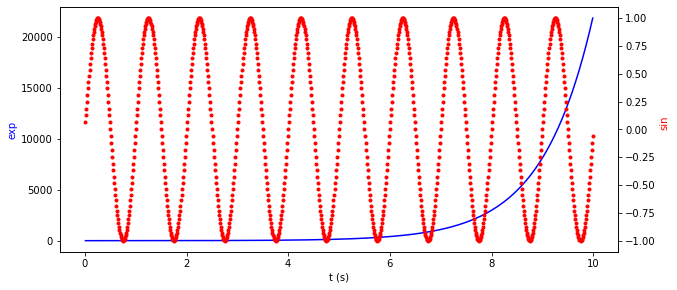

In [12]:
from matplotlib import pyplot as plt
import numpy as np

fig=plt.figure(figsize=(10,5))
fig.autofmt_xdate(rotation=45)
ax1 = fig.add_subplot(111)
t = np.arange(0.01, 10.0, 0.01)
s1 = np.exp(t)
plt.plot(t,s1,'b-')
plt.xlabel('t (s)')
plt.ylabel('exp',color='b')

ax2 = ax1.twinx()
s2 = np.sin(2*np.pi*t)
ax2.plot(t, s2, 'r.')
plt.ylabel('sin', color='r')


ax = plt.gca()
label = ax.yaxis.get_label()
x_lab_pos, y_lab_pos = label.get_position()
label.set_position([1.0, y_lab_pos])
label.set_horizontalalignment('left')
ax.xaxis.set_label(label)


plt.show()